<div class="alert alert-success h1" role="alert">
    <b>Vueling Tech Hack</b>
</div>

por [Guillermo Seoane](https://www.linkedin.com/in/guilleseoane/)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


Download 'Mapping Destination Countries':

Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un Pandas Dataframe. Explora les dades que conté, explica breument quines variables hi ha i queda’t únicament amb les columnes que consideris rellevants. Justifica la teva elecció.

In [2]:
df = pd.read_csv("data/train.csv")

Obtenemos informacion basica del tipo de datos que contiene el dataset con la funcion *info()*.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276982 entries, 0 to 276981
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Date                   276982 non-null  object
 1   Origin Country         276982 non-null  object
 2   Origin Continent       276982 non-null  object
 3   Destination Country    276982 non-null  int64 
 4   Destination Continent  276982 non-null  object
 5   Total flights          276982 non-null  object
 6   Total seats            276982 non-null  object
 7   Total ASKs             276982 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.9+ MB


The information you will have is from the history of air routes. Datasets:

* **Date:** Flight date.
* **Origin_Country:** Country of origin.
* **Origin_Continent:** Continent of origin.
* **Destination_Country:** Country of destination.
* **Destination_Continent:** Destination continent.
* **Total_flights:** Total number of flights.
* **Total_seats:** Total number of seats.
* **Total_ASKs (Available Seat Kilometer):**. Total seat numbers available by the total number of km these seats have flown.  

In [4]:
country_map = {"China": 0, "India": 1, "Russian Federation": 2, "United Arab Emirates": 3, "Austria": 4, "Germany": 5, "Greece": 6, "Italy": 7, "Turkey": 8, "Belgium": 9, "Egypt": 10, "France": 11, "Morocco": 12, "Spain": 13, "Switzerland": 14, "United Kingdom": 15, "South Africa": 16, "United States": 17, "Canada": 18, "Czech Republic": 19, "Ukraine": 20, "Netherlands": 21, "Thailand": 22, "Denmark": 23, "Qatar": 24}

In [5]:
inv_country = {v: k for k, v in country_map.items()}

In [6]:
df['Destination Country'].replace(inv_country, inplace=True)

Utilizamos la función *head()* para visualizar las primeras filas de datos de la estructura del dataset

In [7]:
df.head(5)

,Date,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Total ASKs
0,Jul 2009,United Kingdom,Europe,Spain,Europe,"9,032","1,531,683","2,447,559,137"
1,Apr 2008,Lebanon,Middle East,Belgium,Europe,5,760,"2,389,940"
2,Apr 2005,Switzerland,Europe,France,Europe,"1,471","158,661","66,533,450"
3,Aug 2016,Israel,Middle East,Czech Republic,Europe,117,"23,366","61,557,637"
4,Feb 2019,Albania,Europe,Turkey,Europe,80,"12,854","9,837,347"


In [8]:
df[['Month', 'Year']] = df['Date'].str.rsplit(pat=' ', n=1, expand=True)
df = df.drop('Date', axis=1)

#### Enconding Month

In [9]:
month_map = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [10]:
df['Month'] = df['Month'].map(month_map)

#### Transformación de datos

In [11]:
df['Year'] = df['Year'].astype(np.int64)
df['Total flights'] = df['Total flights'].str.replace(",","").astype(np.int64)
df['Total seats'] = df['Total seats'].str.replace(",","").astype(np.int64)
df['Total ASKs'] = df['Total ASKs'].str.replace(",","").astype(np.int64)

Además añadiremos la siguiente información:
* **Km:** Distance flown

In [12]:
df['Km'] = (df['Total ASKs'] / df['Total seats'])

In [13]:
df['Eficiencia_avión'] = df['Total flights'] / df['Km']

In [14]:
df = df.fillna(0.0)

<div class="alert alert-success h1" role="alert">
    <b>Ánalisis exploratorio de datos</b>
</div>

#### Correlación de las columnas con el target

In [15]:
columns = ['Month', 'Year','Origin Country', 'Origin Continent', 'Destination Country', 
         'Destination Continent', 'Total flights', 'Total seats', 'Km', 'Eficiencia_avión','Total ASKs']
df = df[columns]

<AxesSubplot:>

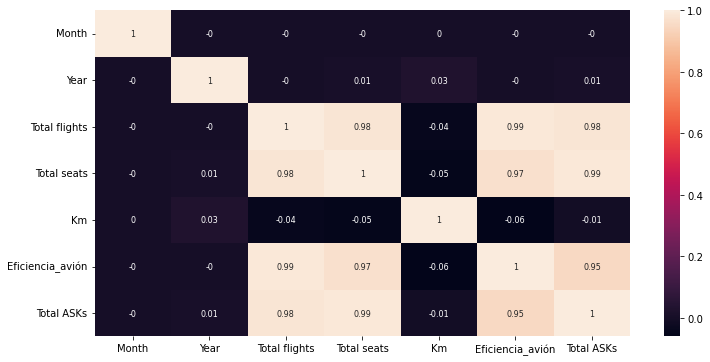

In [16]:
# Calculate correlation between each pair of variable
corr_matrix=df.corr().round(2)

# plot it
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 8})

En este primer análisis, nos permitiremos el tiempo de analizar nuestra base datos en relación a la columna objetivo **ASKs**. El número total de vuelos y el Available Seat Kilometer (ASK) están estrechamente relacionados, ya que ambos son indicadores importantes de la capacidad y eficiencia de una aerolínea o flota de aeronaves.

A continuación realizaremos un análisis exploratorio de los datos que nos permita comprender mejor los datos y encontrar insights

**1. Capacidad de transporte total:** Al multiplicar el número total de vuelos por el ASK por vuelo, se puede obtener una estimación de la capacidad de transporte total de una aerolínea o flota de aeronaves.

In [17]:
min_ASKs = df[df['Total ASKs'] == df['Total ASKs'].min()]
max_ASKs = df[df['Total ASKs'] == df['Total ASKs'].max()]

In [18]:
max_ASKs

,Month,Year,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Km,Eficiencia_avión,Total ASKs
211433,7,2019,United States,North America,United States,North America,771538,89374179,1458.065505,529.151809,130313407467


In [19]:
min_ASKs

,Month,Year,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Km,Eficiencia_avión,Total ASKs
48188,7,2013,Monaco,Europe,France,Europe,1418,0,0.0,0.0,0
90453,7,2013,Indonesia,Asia,United States,North America,2,0,0.0,0.0,0
114199,5,2013,Monaco,Europe,France,Europe,1004,0,0.0,0.0,0


En terminos de carga se observa que las rutas en Estados Unidos son las más rentables por contra de Monaco y Francia. Podemos suponer un error al no tener el número de asientos en los vuelos.

**2. Eficiencia del avión:** El número de vuelos totales y la distancia total recorrida pueden utilizarse para evaluar la eficiencia del avión. Si el número de vuelos es alto y la distancia recorrida es baja, esto sugiere que el avión está siendo utilizado de manera eficiente.

In [20]:
#data10 = df[df['Year'] < 2020]
df.sort_values('Eficiencia_avión',ascending=True).head(10)

,Month,Year,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Km,Eficiencia_avión,Total ASKs
114199,5,2013,Monaco,Europe,France,Europe,1004,0,0.000000,0.000000,0
48188,7,2013,Monaco,Europe,France,Europe,1418,0,0.000000,0.000000,0
90453,7,2013,Indonesia,Asia,United States,North America,2,0,0.000000,0.000000,0
201972,4,2020,Australia,Australasia,Egypt,Africa,1,309,14361.786408,0.000070,4437792
252743,5,2020,Vietnam,Asia,United States,North America,1,314,13330.197452,0.000075,4185682
187474,7,2020,Vietnam,Asia,United States,North America,1,259,13330.196911,0.000075,3452521
250667,11,2004,Guinea,Africa,China,Asia,1,145,13017.986207,0.000077,1887608
134045,8,2020,Mauritania,Africa,China,Asia,1,360,12845.783333,0.000078,4624482
187649,11,2020,Vietnam,Asia,Canada,North America,1,259,12794.285714,0.000078,3313720
258447,6,2020,Vietnam,Asia,Canada,North America,1,259,12794.285714,0.000078,3313720


En terminos de efiencia, vuelos y distancia total recorrida vemos que USA está en el top, por contra de rutas como:
* Australia - Egypt
* Vietnam - USA
* Guinea - China
* Mauritania - China
* Vietnam - Canada
    
La recurrencia de las rutas con grecia hace replantear dichos vuelos. Se puede pensar también en un efecto post covid al ser vuelos que datan del 2020

Rutas menos eficientes enlazan con Grecia y Austria. Siendo la peor ruta quizas Australia Belgica

3. **Eficiencia:** Al comparar el número total de vuelos con el ASK total, se puede determinar cuánto está siendo utilizado cada kilómetro disponible. Esto puede ser un indicador de la eficiencia de una aerolínea o flota de aeronaves.

    El **número total de vuelos** y el **ASK total** son dos medidas diferentes de la actividad de un avión. El número total de vuelos mide la cantidad de viajes que realiza un avión, mientras que el ASK total mide la cantidad de asientos disponibles por kilómetro en todos los vuelos.
    
    Ambas medidas pueden ser útiles para evaluar la eficiencia y productividad de un avión, pero no es posible compararlas directamente ya que miden conceptos diferentes.

In [21]:
min_flights = df[df['Total flights'] == df['Total flights'].min()]
max_flights = df[df['Total flights'] == df['Total flights'].max()]

Por ejemplo, un avión puede realizar muchos vuelos, pero con pocos pasajeros, lo que resultaría en un ASK total bajo.

In [22]:
max_flights

,Month,Year,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Km,Eficiencia_avión,Total ASKs
190994,8,2005,United States,North America,United States,North America,902944,82547758,1282.520563,704.038614,105869197041


In [23]:
min_ASKs

,Month,Year,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Km,Eficiencia_avión,Total ASKs
48188,7,2013,Monaco,Europe,France,Europe,1418,0,0.0,0.0,0
90453,7,2013,Indonesia,Asia,United States,North America,2,0,0.0,0.0,0
114199,5,2013,Monaco,Europe,France,Europe,1004,0,0.0,0.0,0


In [24]:
df[['Month','Year','Origin Country','Destination Country','Total flights','Total ASKs']].sort_values('Total ASKs',ascending=False).head(10)

,Month,Year,Origin Country,Destination Country,Total flights,Total ASKs
211433,7,2019,United States,United States,771538,130313407467
2322,8,2019,United States,United States,774554,128159556880
148975,3,2020,United States,United States,748712,126016578710
16965,6,2019,United States,United States,742990,124888468865
276711,12,2019,United States,United States,733797,122911727697
243248,6,2018,United States,United States,732478,122041775605
221077,10,2019,United States,United States,746034,120925166988
160068,8,2017,United States,United States,742651,119864807332
227008,4,2019,United States,United States,713061,118255293404
70488,5,2018,United States,United States,722065,118176842350


Por otro lado, un avión puede realizar pocos vuelos pero con muchos pasajeros, lo que resultaría en un alto ASK total.

In [25]:
min_ASKs[['Month','Year','Origin Country','Destination Country','Total flights', 'Total seats', 'Km','Total ASKs']]

,Month,Year,Origin Country,Destination Country,Total flights,Total seats,Km,Total ASKs
48188,7,2013,Monaco,France,1418,0,0.0,0
90453,7,2013,Indonesia,United States,2,0,0.0,0
114199,5,2013,Monaco,France,1004,0,0.0,0


En este caso podemos pensar en que se trate de un error al no conocer los datos de asientos que disponemos para los vuelos Monaco - France e Indonesia - USA. 

In [26]:
df[['Month','Year','Origin Country','Destination Country','Total flights', 'Total seats','Total ASKs']].sort_values('Total ASKs',ascending=True).head(10)

,Month,Year,Origin Country,Destination Country,Total flights,Total seats,Total ASKs
90453,7,2013,Indonesia,United States,2,0,0
48188,7,2013,Monaco,France,1418,0,0
114199,5,2013,Monaco,France,1004,0,0
139595,9,2014,Belgium,Belgium,1,112,3605
1530,9,2020,Gibraltar,Morocco,1,70,4844
105634,1,2016,Monaco,France,72,360,6373
34734,9,2013,Saint Barthelemy,United States,2,20,6791
269528,6,2010,Belgium,Belgium,1,105,7773
89544,9,2012,Indonesia,United States,5,30,10573
193451,4,2013,Belgium,Belgium,1,97,11552


**4. Crecimiento:** Al monitorear el número total de vuelos a lo largo del tiempo, podemos evaluar el crecimiento y/o expansión de una aerolínea o flota de aviones. En este caso, en el contexto que estamos, también nos puede dar una idea de la contaminación generada.

<AxesSubplot:xlabel='Year', ylabel='Count'>

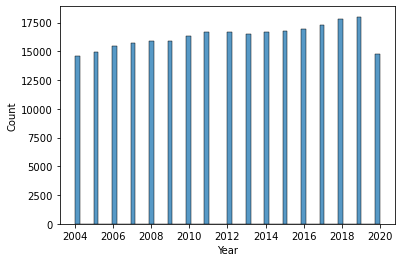

In [27]:
sns.histplot(x=df.Year)

Por lo general podemos ver una creciente evolución en el número de vuelos hasta el 2020, inicio de la pandemia COVID-19.

**5. Vuelos:**

* 5.1. Destinos más populares

In [28]:
import squarify

In [29]:
plotdata1 = df['Destination Country'].value_counts().head(10)

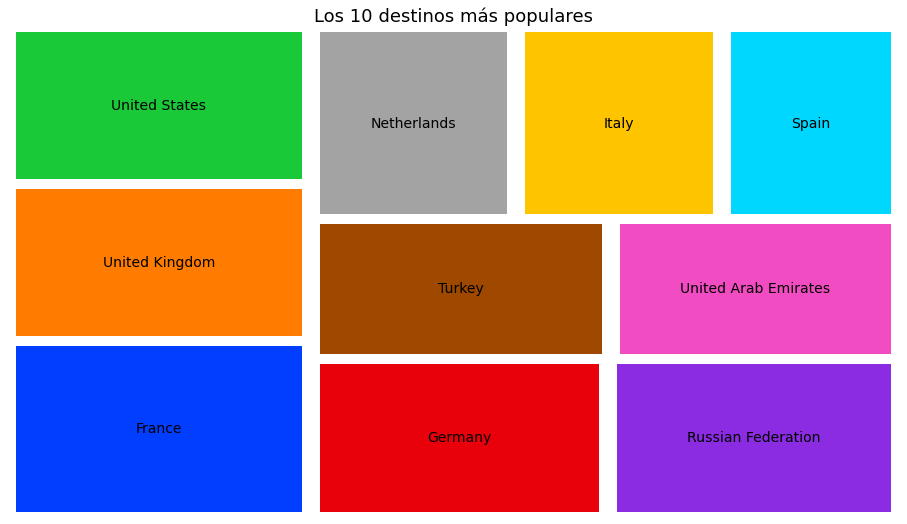

In [30]:
# plot it
colors = sns.color_palette('bright')
plt.figure(figsize=(16, 9))
plt.axis('off')
axis = squarify.plot(sizes=plotdata1.values, label=plotdata1.index, color = colors, pad=1, text_kwargs={'fontsize': 14})

axis.set_title("Los 10 destinos más populares", fontsize=18)

plt.show()

* 5.2. Rutas más largas**

In [31]:
max_ruta = df[df.Km == df.Km.max()]
max_ruta[['Origin Country','Destination Country','Km']]

,Origin Country,Destination Country,Km
220061,Argentina,Thailand,16529.036667


La distancia total del vuelo más largo se encuentra entre Argentina y Tailandia, 16529 Km. 

* 5.3. Aeropuerto con más vuelos

In [32]:
df['Origin Country'].value_counts().head()

Russian Federation    5790
Germany               4252
France                4179
United Kingdom        4106
Turkey                4063
Name: Origin Country, dtype: int64

Los aeropuertos que presentan más vuelos son los de Rusia, Alemania y Francia.

* 5.4. Vuelos por mes

In [33]:
df['Month'].value_counts().head(5)

7     23456
8     23335
10    23329
9     23222
12    23186
Name: Month, dtype: int64

**Julio** es el mes con más vuelos

* 5.5. Ruta más utilizada

In [34]:
plotdata2 = df.groupby(['Origin Country', 'Destination Country']).agg({
                                                            'Total flights': 'sum', 
                                                            'Total seats': 'sum',
                                                            'Eficiencia_avión': 'mean',
                                                            'Total ASKs': 'sum'
                                                                    })

In [35]:
plotdata2.sort_values(by='Total flights', ascending=False).head(10)

,,Total flights,Total seats,Eficiencia_avión,Total ASKs
Origin Country,Destination Country,,,,
United States,United States,122110915,12266317361,547.406774,16475458883996
China,China,37130654,5768921272,190.639120,6717650384252
Canada,Canada,10914211,720474941,59.764553,803921025232
India,India,8367460,1240511260,58.748219,1109039277120
Russian Federation,Russian Federation,5508537,679629604,6.182369,1209026112919
Spain,Spain,4764144,615578219,48.680960,403124125708
United Kingdom,United Kingdom,4759346,431533744,68.531542,180691189899
France,France,3884158,451429947,39.279039,262076619199
Germany,Germany,3670973,472327348,50.943047,202837152135


Observamos que las 10 rutas más populares curiosamente son todas nacionales

In [36]:
nacionales = df[df['Origin Country'] == df['Destination Country']]
internacionales = df[df['Origin Country'] != df['Destination Country']]

In [37]:
internacionales.sort_values(by='Total flights', ascending=False).head(10)

,Month,Year,Origin Country,Origin Continent,Destination Country,Destination Continent,Total flights,Total seats,Km,Eficiencia_avión,Total ASKs
231782,8,2012,United States,North America,Canada,North America,19190,1470578,1500.742893,12.787000,2206959482
247249,7,2012,Canada,North America,United States,North America,18909,1459846,1513.532534,12.493289,2209524416
53146,7,2012,United States,North America,Canada,North America,18898,1459246,1513.423556,12.486921,2208457271
184430,7,2010,Canada,North America,United States,North America,18448,1361302,1526.498391,12.085175,2078025312
91557,8,2008,United States,North America,Canada,North America,18432,1382999,1520.159613,12.125043,2102379225
51189,8,2013,United States,North America,Canada,North America,18420,1442248,1541.733313,11.947592,2223561787
206593,8,2013,Canada,North America,United States,North America,18414,1441872,1542.015766,11.941512,2223389356
10304,3,2013,United States,North America,Canada,North America,18372,1546144,1629.463271,11.274878,2519384859
186551,7,2008,United States,North America,Canada,North America,18357,1384105,1522.882653,12.054113,2107829494
171756,8,2010,United States,North America,Canada,North America,18348,1349788,1517.340643,12.092209,2048088192
